# Classifying Cybersecurity Incidents with Machine Learning

## Handling the Train Data First

## Importing the required libraries 
<p>Importing the required libraries is the first thing we need to do when we do a python program here we first import libraries like pandas, sklearn, matplotlib, xgboost etc.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

## Importing the Dataset

In [3]:
data=pd.read_csv('/Users/deepanshudubb/Documents/cyber project/Guide_train.csv')

## Printing  Data
<p>Print the data and also take info by using info() and using data.head() and various other methods to inspect the type of variables(categorical,numerical) and the distribution of TP,BP,FP.</P>

In [4]:
data

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [6]:
data.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [7]:
list(data.columns)

['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'Timestamp',
 'DetectorId',
 'AlertTitle',
 'Category',
 'MitreTechniques',
 'IncidentGrade',
 'ActionGrouped',
 'ActionGranular',
 'EntityType',
 'EvidenceRole',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'AccountSid',
 'AccountUpn',
 'AccountObjectId',
 'AccountName',
 'DeviceName',
 'NetworkMessageId',
 'EmailClusterId',
 'RegistryKey',
 'RegistryValueName',
 'RegistryValueData',
 'ApplicationId',
 'ApplicationName',
 'OAuthApplicationId',
 'ThreatFamily',
 'FileName',
 'FolderPath',
 'ResourceIdName',
 'ResourceType',
 'Roles',
 'OSFamily',
 'OSVersion',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict',
 'CountryCode',
 'State',
 'City']

In [8]:
data.shape

(9516837, 45)

## Data Preprocessing
<p>Data Preprocessing is the process of analysis of rawdata after it is coverated to its suitable form.</p>
<p>Data Preprocessing contains Handling missing data,Feature Engineering and Encoding Categorical Variables.</p>

<P>We will calculate percentage null values for eacha and every column using isnull() function </P>

In [9]:
(data.isnull().sum()/(len(data)))*100
     

Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.460120
IncidentGrade          0.539465
ActionGrouped         99.410897
ActionGranular        99.410897
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.982729
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApplicationId     0.000000
ThreatFa

## Removing columns
<p>Removing those columns which has null values above 50%</p>
<P>First we set the threshold to 50% and the we dropped the columns</p>

In [10]:
threshold= len(data)* 0.5   # removing 50% above null value
data_tst=data.dropna(thresh=threshold,axis=1)

In [11]:
data.shape

(9516837, 45)

<p>Now we will check duplicate values and we will drop the duplicate values from the data</p>

In [12]:
data.duplicated().sum()

np.int64(22559)

<p>Dropping the duplicate values from the data using drop_duplicate function</p>

In [13]:
data.drop_duplicates(inplace=True)

In [14]:

data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5459368
IncidentGrade           51322
ActionGrouped         9438232
ActionGranular        9438232
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9397469
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9420765
FileName                    0
FolderPath

In [15]:
data["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0], inplace=True)


/var/folders/sp/fpbt_7494p7_8zclm39gmc8m0000gn/T/ipykernel_31478/3548832805.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["IncidentGrade"].fillna(data_tst["IncidentGrade"].mode()[0], inplace=True)


<P>We will print the unique values which are present in the IncidentGrade column, which is our target variable</p>


In [16]:
data.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive'], dtype=object)

## Cleaning the Timestamp column
<p>When we were inspecting the data,we noticed that the Timestamp column is not in the correct format, First we will clean it by converting it to datetime format</p>

In [17]:
data['Timestamp']=pd.to_datetime(data['Timestamp']) # data clean Timestamp

<p>We got the DateTime column where date and time is seperated but we need to convert into more correct format<p>


In [18]:
data['Timestamp'].head()

0   2024-06-04 06:05:15+00:00
1   2024-06-14 03:01:25+00:00
2   2024-06-13 04:52:55+00:00
3   2024-06-10 16:39:36+00:00
4   2024-06-15 01:08:07+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

<p>After getting the TImeStamp, we will made different columns like day, month,year,hour and time</P>

In [19]:
data["Day"] = data["Timestamp"].dt.day
data["Month"] = data["Timestamp"].dt.month
data["Year"] = data["Timestamp"].dt.year
data["Hour"] = data["Timestamp"].dt.hour
data["Time"] = data["Timestamp"].dt.time


<p>Dropping the Timestamp column</p>

In [20]:
data.drop("Timestamp",axis=1,inplace=True)   # doprring timestamp column
data.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,...,SuspicionLevel,LastVerdict,CountryCode,State,City,Day,Month,Year,Hour,Time
0,180388628218,0,612,123247,7,6,InitialAccess,NaN,TruePositive,NaN,...,NaN,NaN,31,6,3,4,6,2024,6,06:05:15
1,455266534868,88,326,210035,58,43,Exfiltration,NaN,FalsePositive,NaN,...,NaN,NaN,242,1445,10630,14,6,2024,3,03:01:25
2,1056561957389,809,58352,712507,423,298,InitialAccess,T1189,FalsePositive,NaN,...,Suspicious,Suspicious,242,1445,10630,13,6,2024,4,04:52:55
3,1279900258736,92,32992,774301,2,2,CommandAndControl,NaN,BenignPositive,NaN,...,Suspicious,Suspicious,242,1445,10630,10,6,2024,16,16:39:36
4,214748368522,148,4359,188041,9,74,Execution,NaN,TruePositive,NaN,...,NaN,NaN,242,1445,10630,15,6,2024,1,01:08:07


<p>Counting the total values of BenignPositive,TruePositive and FalsePositive using value_count() function.</p>

In [21]:
data['IncidentGrade'].value_counts()
     

IncidentGrade
BenignPositive    4162070
TruePositive      3302644
FalsePositive     2029564
Name: count, dtype: int64

<P>Printing the unique column names for the analysis</p>

In [22]:

data.Category.unique()

array(['InitialAccess', 'Exfiltration', 'CommandAndControl', 'Execution',
       'SuspiciousActivity', 'Impact', 'Collection', 'CredentialAccess',
       'Persistence', 'Discovery', 'Malware', 'DefenseEvasion', 'Exploit',
       'PrivilegeEscalation', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'CredentialStealing', 'WebExploit',
       'Weaponization'], dtype=object)

<p>Checking the total null values in the columnn</p>

In [23]:

data.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5459368
IncidentGrade               0
ActionGrouped         9438232
ActionGranular        9438232
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9397469
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9420765
FileName                    0
FolderPath                  0
ResourceId

<p>From this we can visualize the coutplot IncidentGrade column which contain BeingPositive, FalsePostive and TruePositive</p>

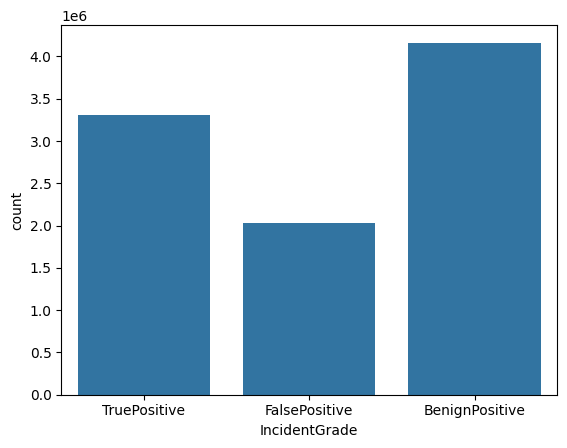

In [24]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=data)
plt.show()

<P>By plotting the barplot we can visualize the distribution of IncidentGrade counts across days of the month where on y-axis we can see the count and on x-axis we can see day of the month and BeingPositive represented by blue colour, FalsePositive Represented by orange colour and TruePositive represented by green colour</p>

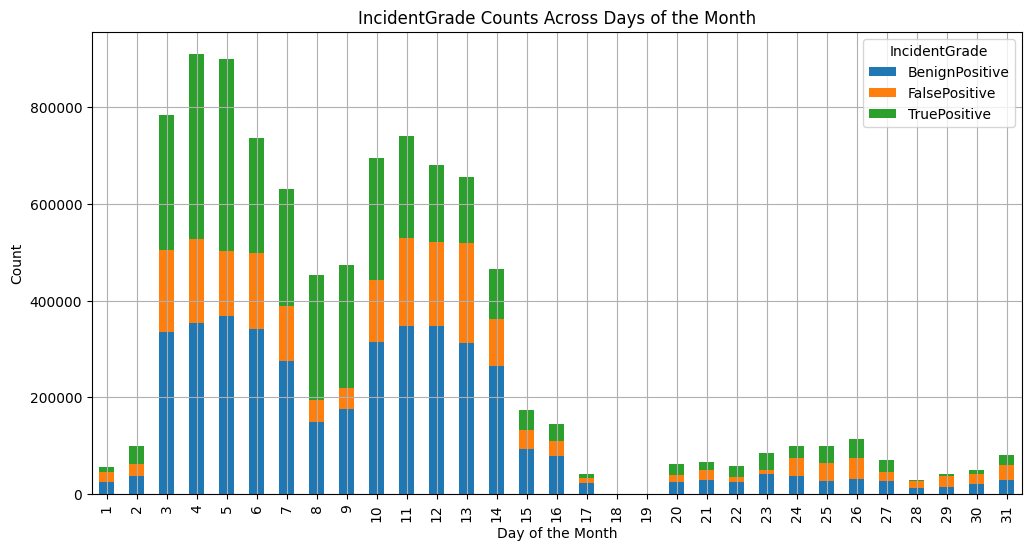

In [25]:
# Aggregate data
day_incident_grade = data.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

<p>Following barplot tells us counts of various columns on y-axis we can see the counts which we will multiply by 10 raise to power 6 as we can see le6 on left corner of barplot and x-axis represnt the columns with respect to IncidentGrade</p>

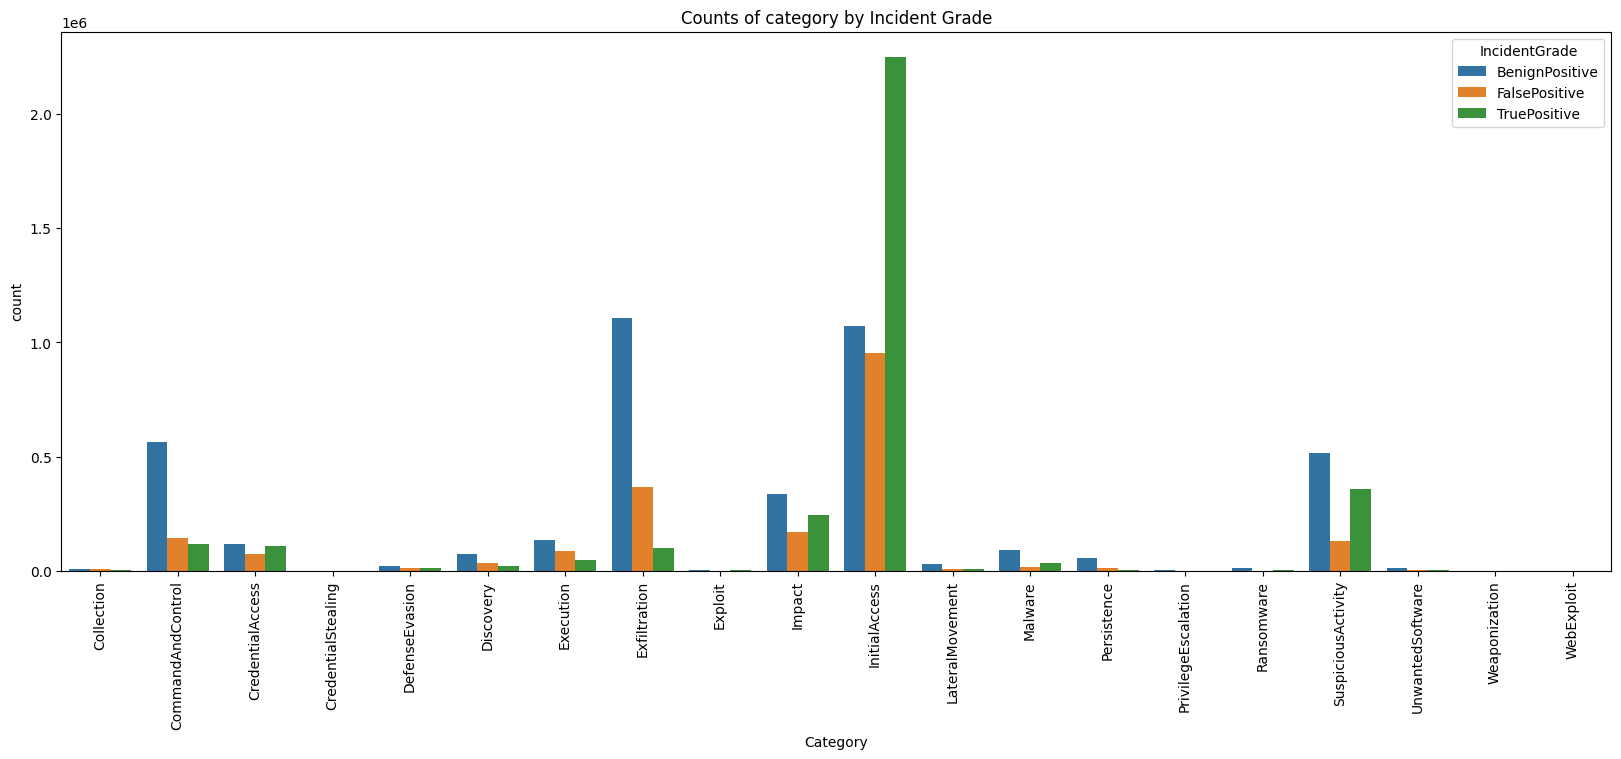

In [26]:
 #ggregate data
grouped_data=data.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

<p>Crearing a barplot with matplotlib which contains counts of entity type by incident grade, on y-axis we can see the count and on the x-axis we can see the entity type which are column names</p>

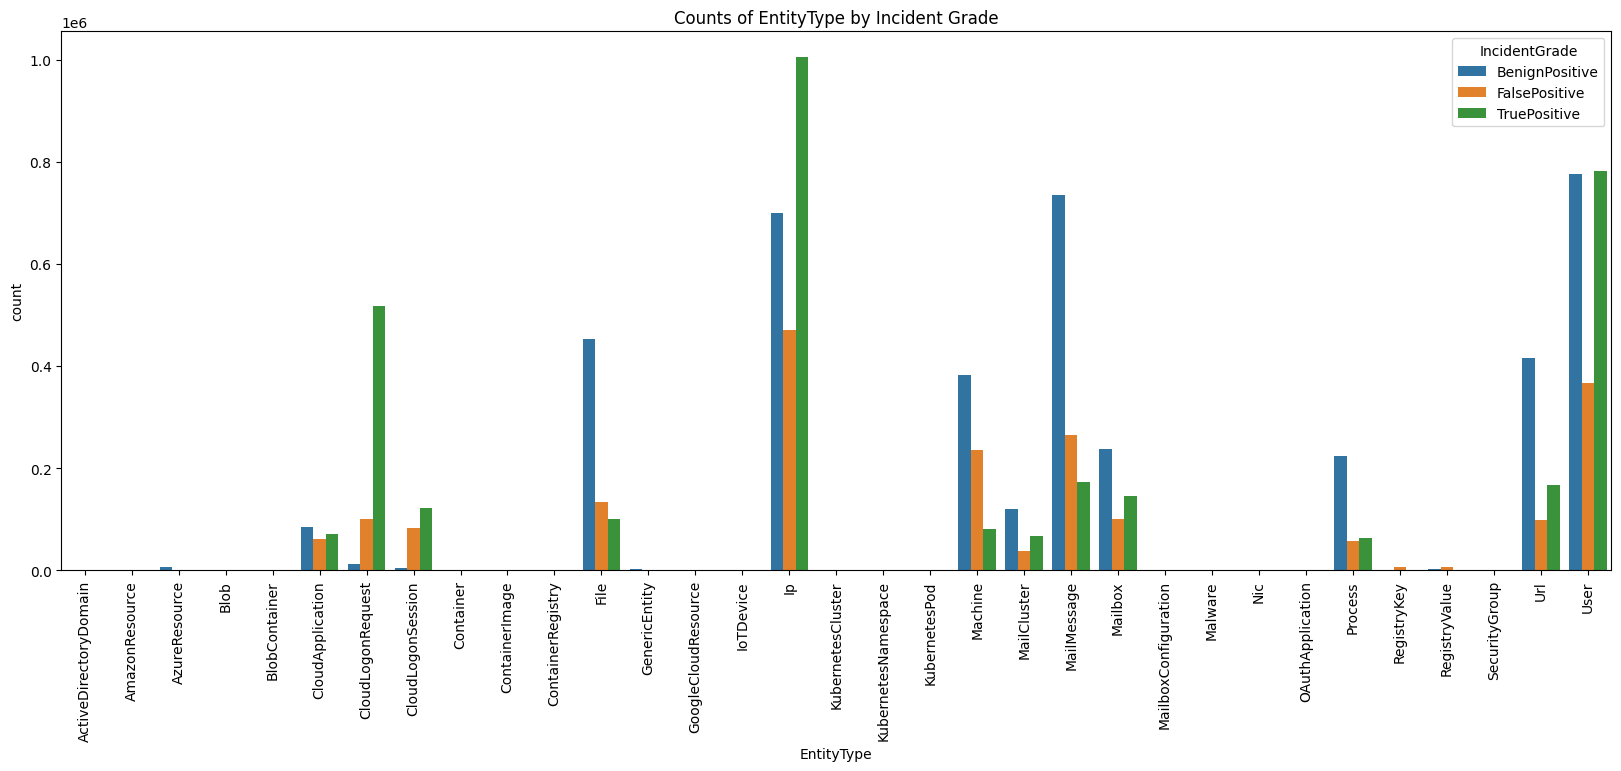

In [27]:
# Aggregate data
grouped_data=data.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()


<p>We will drop the 70% of correlated columns as we didn't need them in our analysis and model training

In [28]:
# dropping 70% above correlated columns
data.drop(["Month","DeviceName","DeviceId","ResourceIdName","ActionGranular","MitreTechniques","ActionGrouped","EmailClusterId","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

<P>Now we will Fill the missing values in State, country code, and city columns </p>

In [29]:
data['State'].fillna(data['State'].mode()[0], inplace=True)
data['CountryCode'].fillna(data['CountryCode'].mode()[0], inplace=True)
data['City'].fillna(data['City'].mode()[0], inplace=True)
     

/var/folders/sp/fpbt_7494p7_8zclm39gmc8m0000gn/T/ipykernel_31478/3714130304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['State'].fillna(data['State'].mode()[0], inplace=True)
/var/folders/sp/fpbt_7494p7_8zclm39gmc8m0000gn/T/ipykernel_31478/3714130304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9494278 entries, 0 to 9516836
Data columns (total 39 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Id                 int64 
 1   OrgId              int64 
 2   IncidentId         int64 
 3   AlertId            int64 
 4   DetectorId         int64 
 5   AlertTitle         int64 
 6   Category           object
 7   IncidentGrade      object
 8   EntityType         object
 9   EvidenceRole       object
 10  Sha256             int64 
 11  IpAddress          int64 
 12  Url                int64 
 13  AccountSid         int64 
 14  AccountUpn         int64 
 15  AccountObjectId    int64 
 16  AccountName        int64 
 17  RegistryKey        int64 
 18  RegistryValueName  int64 
 19  RegistryValueData  int64 
 20  ApplicationId      int64 
 21  ApplicationName    int64 
 22  ThreatFamily       object
 23  FileName           int64 
 24  FolderPath         int64 
 25  ResourceType       object
 26  Roles              

<p>To Check the Corelation between the columns in the data we will place Heatmap, after it we will remove the correlated columns from the dataset</p>

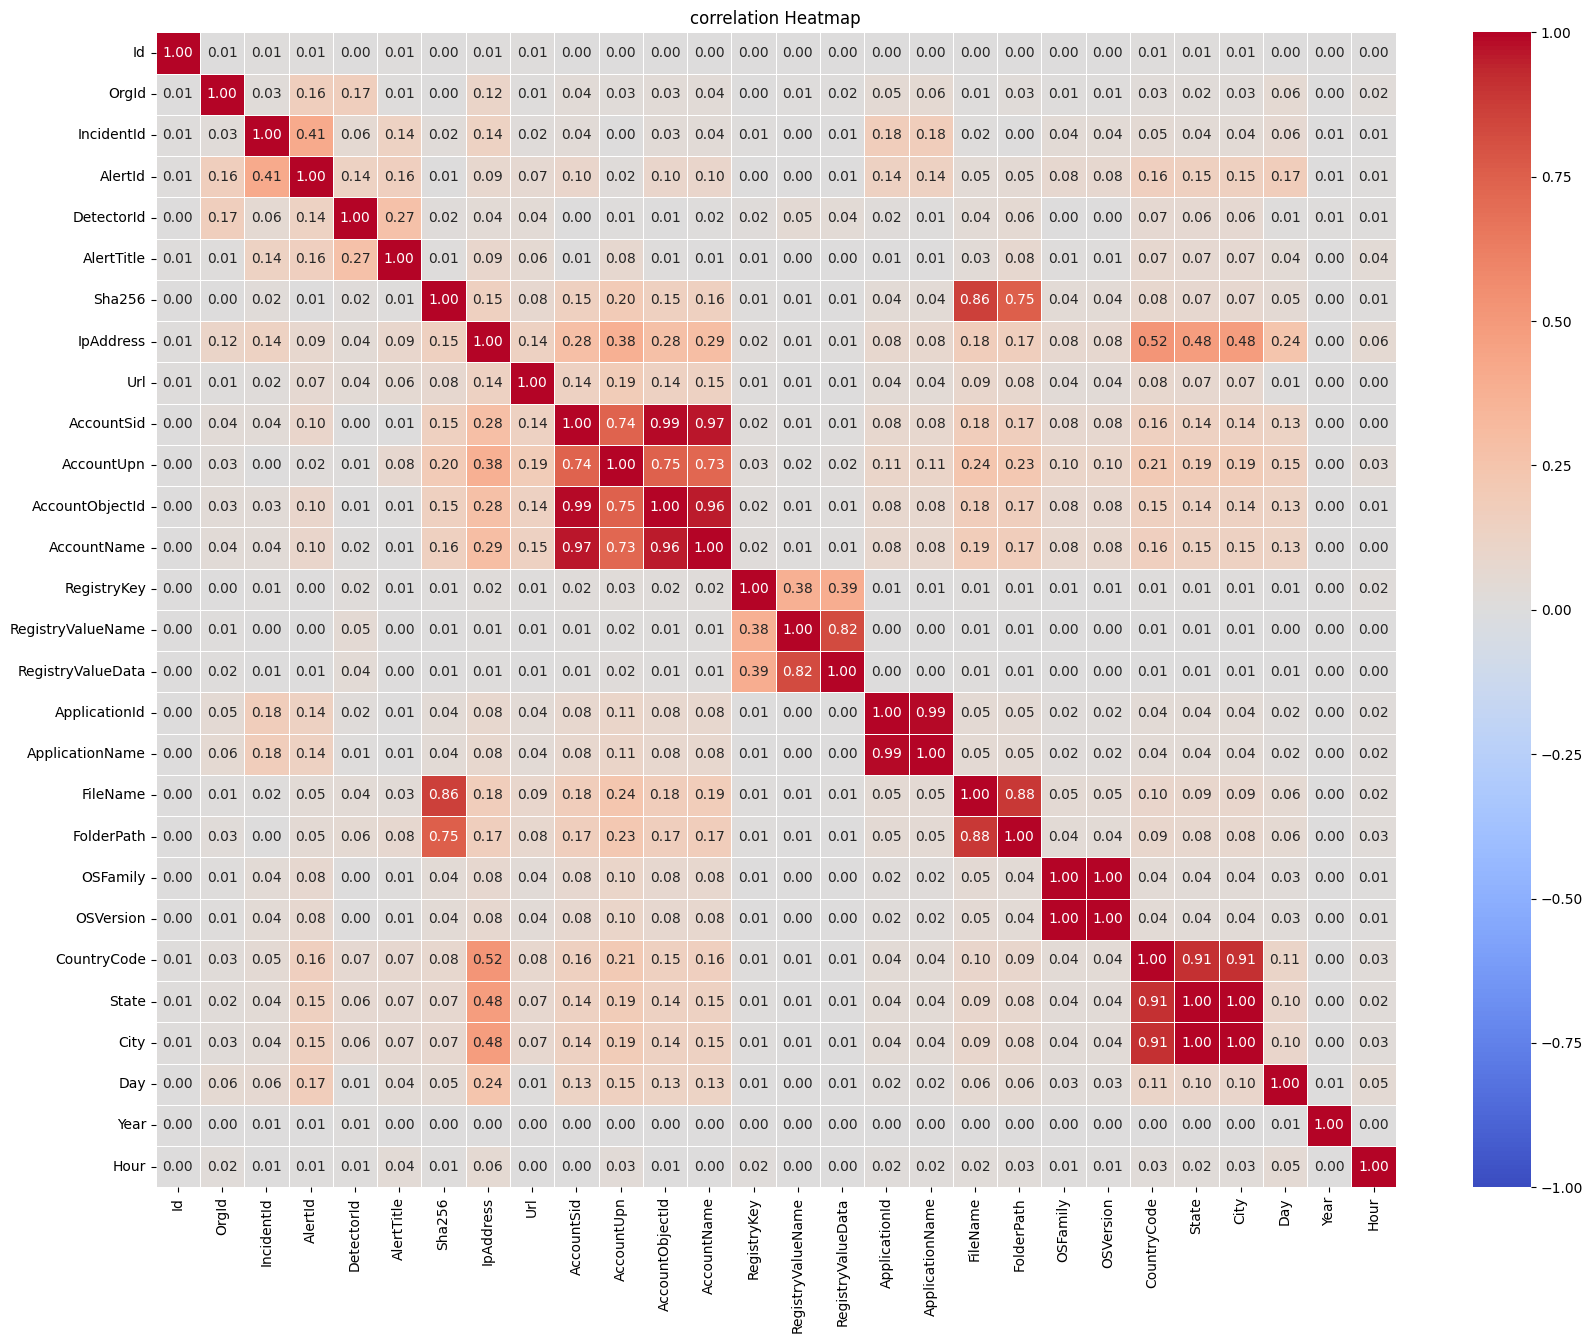

In [31]:
# selecting numerical col
numeric_df=data.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

## Removing the Correlated columns from the DataFrame

In [32]:
# dropping 70% above correlated columns
data.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)

In [33]:
# dropping 70% above correlated columns
data.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)

In [34]:
# dropping 70% above correlated columns
data.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)

In [35]:
# dropping 70% above correlated columns
data.drop(["ThreatFamily","ResourceType","Roles","AntispamDirection","SuspicionLevel","LastVerdict"],axis=1,inplace=True)

In [36]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9494278 entries, 0 to 9516836
Data columns (total 16 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   OrgId          int64 
 1   IncidentId     int64 
 2   AlertId        int64 
 3   AlertTitle     int64 
 4   Category       object
 5   IncidentGrade  object
 6   EntityType     object
 7   EvidenceRole   object
 8   IpAddress      int64 
 9   Url            int64 
 10  ApplicationId  int64 
 11  City           int64 
 12  Day            int32 
 13  Year           int32 
 14  Hour           int32 
 15  Time           object
dtypes: int32(3), int64(8), object(5)
memory usage: 1.1+ GB


<P>Identifying the object datatype and printing them for futher analysis</p>

In [37]:
data.select_dtypes(include=["object"]).columns
     

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [38]:
Categorical_coltr=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']

## Encoder
<p>Applying encoder to convert categorical values into numerical values.</p>

In [39]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode categorical columns
categorical_columns = ['Category', 'EntityType', 'EvidenceRole', 'Time']
label_encoder = LabelEncoder()

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Separate features and target
oval = data.drop(columns=['OrgId', 'IncidentId', 'AlertId', 'Time', 'IncidentGrade'])
atar = data['IncidentGrade']

# Apply oversampling
os = RandomOverSampler(random_state=94)
oval_resampled, atar_resampled = os.fit_resample(oval, atar)

print("Original class distribution:\n", atar.value_counts())
print("Resampled class distribution:\n", atar_resampled.value_counts())


Original class distribution:
 IncidentGrade
BenignPositive    4162070
TruePositive      3302644
FalsePositive     2029564
Name: count, dtype: int64
Resampled class distribution:
 IncidentGrade
TruePositive      4162070
FalsePositive     4162070
BenignPositive    4162070
Name: count, dtype: int64


<p>Selecting the columns which are of datatype int32, int 64 and float64 </p>

In [40]:
data.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'EntityType', 'EvidenceRole', 'IpAddress', 'Url', 'ApplicationId',
       'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [41]:
# TRAIN TEST SPLIT
data.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,0,612,123247,6,10,TruePositive,15,1,27,160396,2251,3,4,2024,6,21915
1,88,326,210035,43,7,FalsePositive,32,0,360606,160396,2251,10630,14,2024,3,10885
2,809,58352,712507,298,10,FalsePositive,31,1,360606,68652,2251,10630,13,2024,4,17575
3,92,32992,774301,2,1,BenignPositive,31,1,360606,13,2251,10630,10,2024,16,59976
4,148,4359,188041,74,6,TruePositive,32,0,360606,160396,2251,10630,15,2024,1,4087


### RandomOverSampler
<p>it creates an instance of this class with a random state of 94 with features val and target vairable tar. , val contains all columns expect the IncidentGrade column which is assigned to the tar variable</p>

In [42]:
from imblearn.over_sampling import RandomOverSampler
     

os =RandomOverSampler(random_state = 94)
oval =data.drop('IncidentGrade', axis =1)    
otar = data['IncidentGrade']



<p>Counting the total counts of the target varibale with is IncidentGrade.

In [43]:
otar.value_counts()

IncidentGrade
BenignPositive    4162070
TruePositive      3302644
FalsePositive     2029564
Name: count, dtype: int64

<p>To Oversample the miniority class we used the randomoversampler to balance the class

In [44]:
oval,otar = os.fit_resample(oval,otar)

<p>It will count the values of the otar which is our target variable after the oversampling</P>

In [45]:
otar.value_counts() 

IncidentGrade
TruePositive      4162070
FalsePositive     4162070
BenignPositive    4162070
Name: count, dtype: int64

<P>For classification task , we intiallize the random forest classifier with 800 trees anf 79 random state

In [46]:
RC = RandomForestClassifier(n_estimators = 800, random_state =79)

<p>Here we used fit function before training our machine learning model on oversampled data oval which represent features and otar represnt targert variable</p>

<p>This first creates a DataFrame with two columns: "columns" and "Score". The "columns" column store  the column names from the oval DataFrame, and the "Score" column stores the feature importances which is calculated by the Random Forest Classifier (RC)

<p>By selecting these columns it reduces dimensions of the data and improve its model performance</p>

In [47]:
oval = oval[[
 'AlertTitle',
 'Day',
 'Category',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']]

<P>Now we will use train data and test data and split it by train_test-split with random state 43</p>


In [48]:
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [49]:
traindata.shape

(9988968, 11)

## Importing the Libraries RandomForestClassifier and xgboost

In [50]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost
     

<p>Creating Decision Tree with more parameters to prevent model from overfitting and complexity of model</p>

In [51]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

<p>Training the data with Decision tree classifier</p>

In [52]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

<p>This defines a function which will calculate and return a DataFrame containing key performance metrics (accuracy, precision, recall, macro F1-score) for a classification model.

In [53]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

<P>Making the predictions on the train data and test data</p>

In [54]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)
     

In [55]:
dttrain_metrics=metrics(trainlab,dttr_pred)
dttest_metrics=metrics(testlab,dtts_pred)   

<p>Making the dataframe for comparing the training and testing data</p>


In [56]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,59.412724,59.440134
1,Precision,62.082146,62.112163
2,Recall,59.411835,59.443693
3,Macro F1,59.846393,59.871125


<P>Defining and training the RandomForestClassifier with specific parameters like entropy to measure the imformation gain got from spliiting and morw features to enhance the performance of the model.</p>

In [57]:
classifier=RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)
classifier.fit(traindata,trainlab)


RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [58]:

rftr_pred =classifier.predict(traindata)
rfts_pred =classifier.predict(testdata)

In [59]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [60]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,66.417432,66.414228
1,Precision,68.791961,68.776270
2,Recall,66.419161,66.407327
3,Macro F1,66.145443,66.138819


<P>Traning the xgboost model with specific hyperparameters and use it to make predictions

In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
trainlab_encoded = label_encoder.fit_transform(trainlab)
testlab_encoded = label_encoder.transform(testlab)  # Use the same encoder

# Mapping of labels
print("Label Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Label Mapping: {'BenignPositive': 0, 'FalsePositive': 1, 'TruePositive': 2}


In [62]:
import xgboost as xgb

# Initialize the XGBoost model
xgbmodel = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=100,
    n_jobs=-1,
    max_depth=8
)

# Fit the model with encoded labels
xgbmodel.fit(traindata, trainlab_encoded)

# Predict using the model
xgbtr_pred = xgbmodel.predict(traindata)
xgbts_pred = xgbmodel.predict(testdata)



In [63]:
xgbtr_pred_decoded = label_encoder.inverse_transform(xgbtr_pred)
xgbts_pred_decoded = label_encoder.inverse_transform(xgbts_pred)

<p>This will provide us insights into the model's performance on both seen (training) and unseen (testing) data<p>

In [64]:
# Pad the shorter array to match the longer one (training predictions)
max_len = max(len(xgbtr_pred_decoded), len(xgbts_pred_decoded))
xgbtr_pred_decoded_padded = np.pad(xgbtr_pred_decoded, (0, max_len - len(xgbtr_pred_decoded)), mode='constant', constant_values=np.nan)
xgbts_pred_decoded_padded = np.pad(xgbts_pred_decoded, (0, max_len - len(xgbts_pred_decoded)), mode='constant', constant_values=np.nan)

# Create DataFrame with padded predictions
V = pd.DataFrame({
    "Training": xgbtr_pred_decoded_padded,
    "Testing": xgbts_pred_decoded_padded
}).reset_index(drop=True)

# Display the first few rows
print(V.head())


         Training         Testing
0  BenignPositive   FalsePositive
1    TruePositive  BenignPositive
2  BenignPositive  BenignPositive
3  BenignPositive   FalsePositive
4  BenignPositive  BenignPositive


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training and testing sets
accuracy_train = accuracy_score(trainlab, xgbtr_pred_decoded)
accuracy_test = accuracy_score(testlab, xgbts_pred_decoded)

precision_train = precision_score(trainlab, xgbtr_pred_decoded, average='macro')
precision_test = precision_score(testlab, xgbts_pred_decoded, average='macro')

recall_train = recall_score(trainlab, xgbtr_pred_decoded, average='macro')
recall_test = recall_score(testlab, xgbts_pred_decoded, average='macro')

f1_train = f1_score(trainlab, xgbtr_pred_decoded, average='macro')
f1_test = f1_score(testlab, xgbts_pred_decoded, average='macro')

# Create the DataFrame with metrics
metrics_df = pd.DataFrame({
    "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
    "Training": [accuracy_train, precision_train, recall_train, f1_train],
    "Testing": [accuracy_test, precision_test, recall_test, f1_test]
})

# Print the metrics DataFrame
print(metrics_df)


     Metrics  Training   Testing
0   Accuracy  0.746318  0.746207
1  Precision  0.755281  0.755101
2     Recall  0.746319  0.746205
3   Macro F1  0.746642  0.746515


# Now Using the Test Data
<p>Importing the datset is the first step after the importing the libraries</p>

In [2]:
df=pd.read_csv("/Users/deepanshudubb/Documents/cyber project/Guide_test.csv")

/var/folders/sp/fpbt_7494p7_8zclm39gmc8m0000gn/T/ipykernel_4572/442627963.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/Users/deepanshudubb/Documents/cyber project/Guide_test.csv")


## Printing the Head of Dataset
<p>When we want to print the first five Rows of the data we use Data.head() </p>

In [3]:
df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [4]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


<p>Displaying Maximun values of the columns</p>

In [5]:
pd.set_option('display.max_columns', None)
df.head(1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private


In [7]:
df.shape

(4147992, 46)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4147992 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

## Handling data

## Removing columns
<p>Removing those columns which has null values above 50%</p>
<P>First we set the threshold to 50% and the we dropped the columns</p>

In [9]:
threshold= len(df)* 0.5   # removing 50% above null value
df.dropna(thresh=threshold,axis=1)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,BenignPositive,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,BenignPositive,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,1631,635,860,2251,3421,881,289573,117668,3586,0,0,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,BenignPositive,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,14,22,3586,5,66,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,BenignPositive,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,13354,13012,13489,14567,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,BenignPositive,User,Impacted,98799,138268,360606,160396,95744,172717,96809,107151,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,FalsePositive,Ip,Related,98799,138268,1084,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,BenignPositive,Mailbox,Impacted,98799,138268,360606,160396,53146,59351,53421,25428,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,Private


In [10]:
df.shape

(4147992, 46)

## Checking for the duplicates Values
<p>We will Check for the duplicate values then we will remove the duplicate values usinfg drop_duplicate function

In [11]:
df.duplicated().sum()

np.int64(104)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147888 entries, 0 to 4147991
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      float64
 

## Imputation because of Catagorical columns
<p>We saw that we have missing values in the categorical columns for it we used imputation technique in column "IncidentGrade"</p>

In [14]:
#mode imputation because of catagorial columns

df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0],inplace=True)

/var/folders/sp/fpbt_7494p7_8zclm39gmc8m0000gn/T/ipykernel_4572/393856128.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["IncidentGrade"].fillna(df["IncidentGrade"].mode()[0],inplace=True)


## Handling the Timestamp column 
<p> We will convert Timestamp column into datetime format for easily understatement of df and time.</p>

In [15]:
df['Timestamp']=pd.to_datetime(df['Timestamp']) # df clean Timestamp

In [16]:
df['Timestamp'].head()

0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

<p>After getting the TImeStamp, we will made different columns like day, month,year,hour and time</P>

In [17]:
df["Day"]=df["Timestamp"].dt.day
df["Month"]=df["Timestamp"].dt.month
df["Year"]=df["Timestamp"].dt.year
df["Hour"]=df["Timestamp"].dt.hour
df["Time"]=df["Timestamp"].dt.time

In [18]:
[features for features in df.columns if df[features].isnull().sum()>0]

['MitreTechniques',
 'ActionGrouped',
 'ActionGranular',
 'EmailClusterId',
 'ThreatFamily',
 'ResourceType',
 'Roles',
 'AntispamDirection',
 'SuspicionLevel',
 'LastVerdict']

In [19]:
df.drop("Timestamp", axis=1, inplace=True)

In [20]:
pd.set_option("display.max_columns", None)
df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public,6,6,2024,17,17:42:05


In [21]:
df['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    1752895
TruePositive      1492329
FalsePositive      902664
Name: count, dtype: int64

In [22]:
df.IncidentGrade.unique()

array(['BenignPositive', 'FalsePositive', 'TruePositive'], dtype=object)

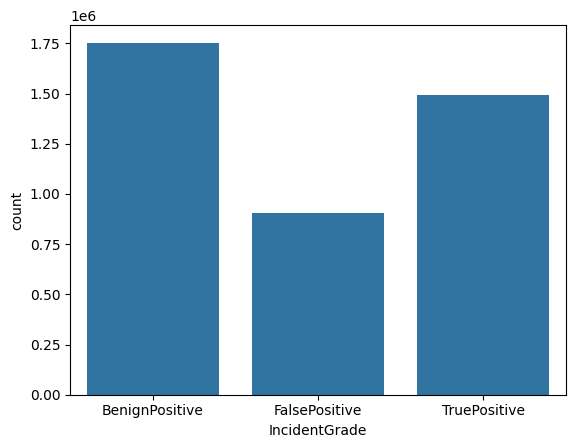

In [23]:
# Distribution of target variable
sns.countplot(x="IncidentGrade", data=df)
plt.show()

<P>By plotting the barplot we can visualize the distribution of IncidentGrade counts across days of the month where on y-axis we can see the count and on x-axis we can see day of the month and BeingPositive represented by blue colour, FalsePositive Represented by orange colour and TruePositive represented by green colour</p>

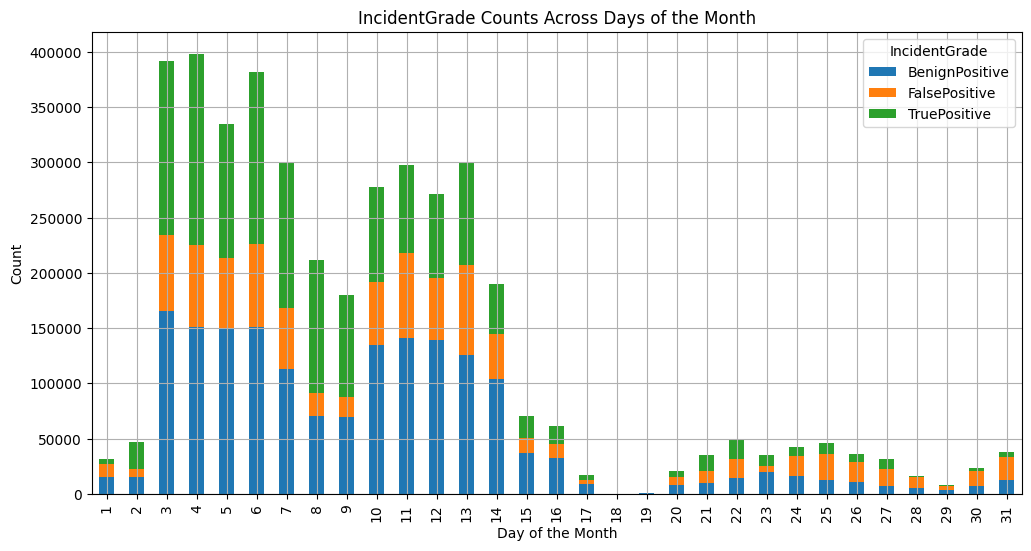

In [24]:
# Aggregate data
day_incident_grade = df.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

<P>By plotting the barplot we can visualize the distribution of IncidentGrade counts across hour of day where on y-axis we can see the count and on x-axis we can see hour of the day and BeingPositive represented by blue colour, FalsePositive Represented by orange colour and TruePositive represented by green colour</p>

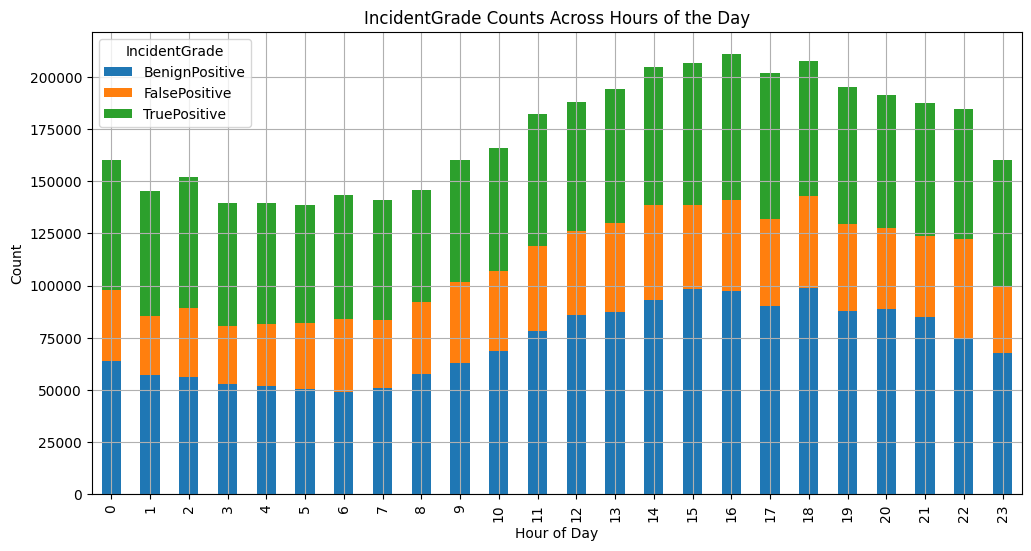

In [25]:
# Aggregate data

hour_incident =df.groupby(['Hour', 'IncidentGrade']).size().unstack()

hour_incident.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel("Hour of Day")
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title="IncidentGrade")
plt.grid(True)
plt.show()

In [26]:
# dropping 70% above correlated columns
df.drop(["DeviceName","DeviceId","ResourceIdName","ActionGranular","MitreTechniques","ActionGrouped","EmailClusterId","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)

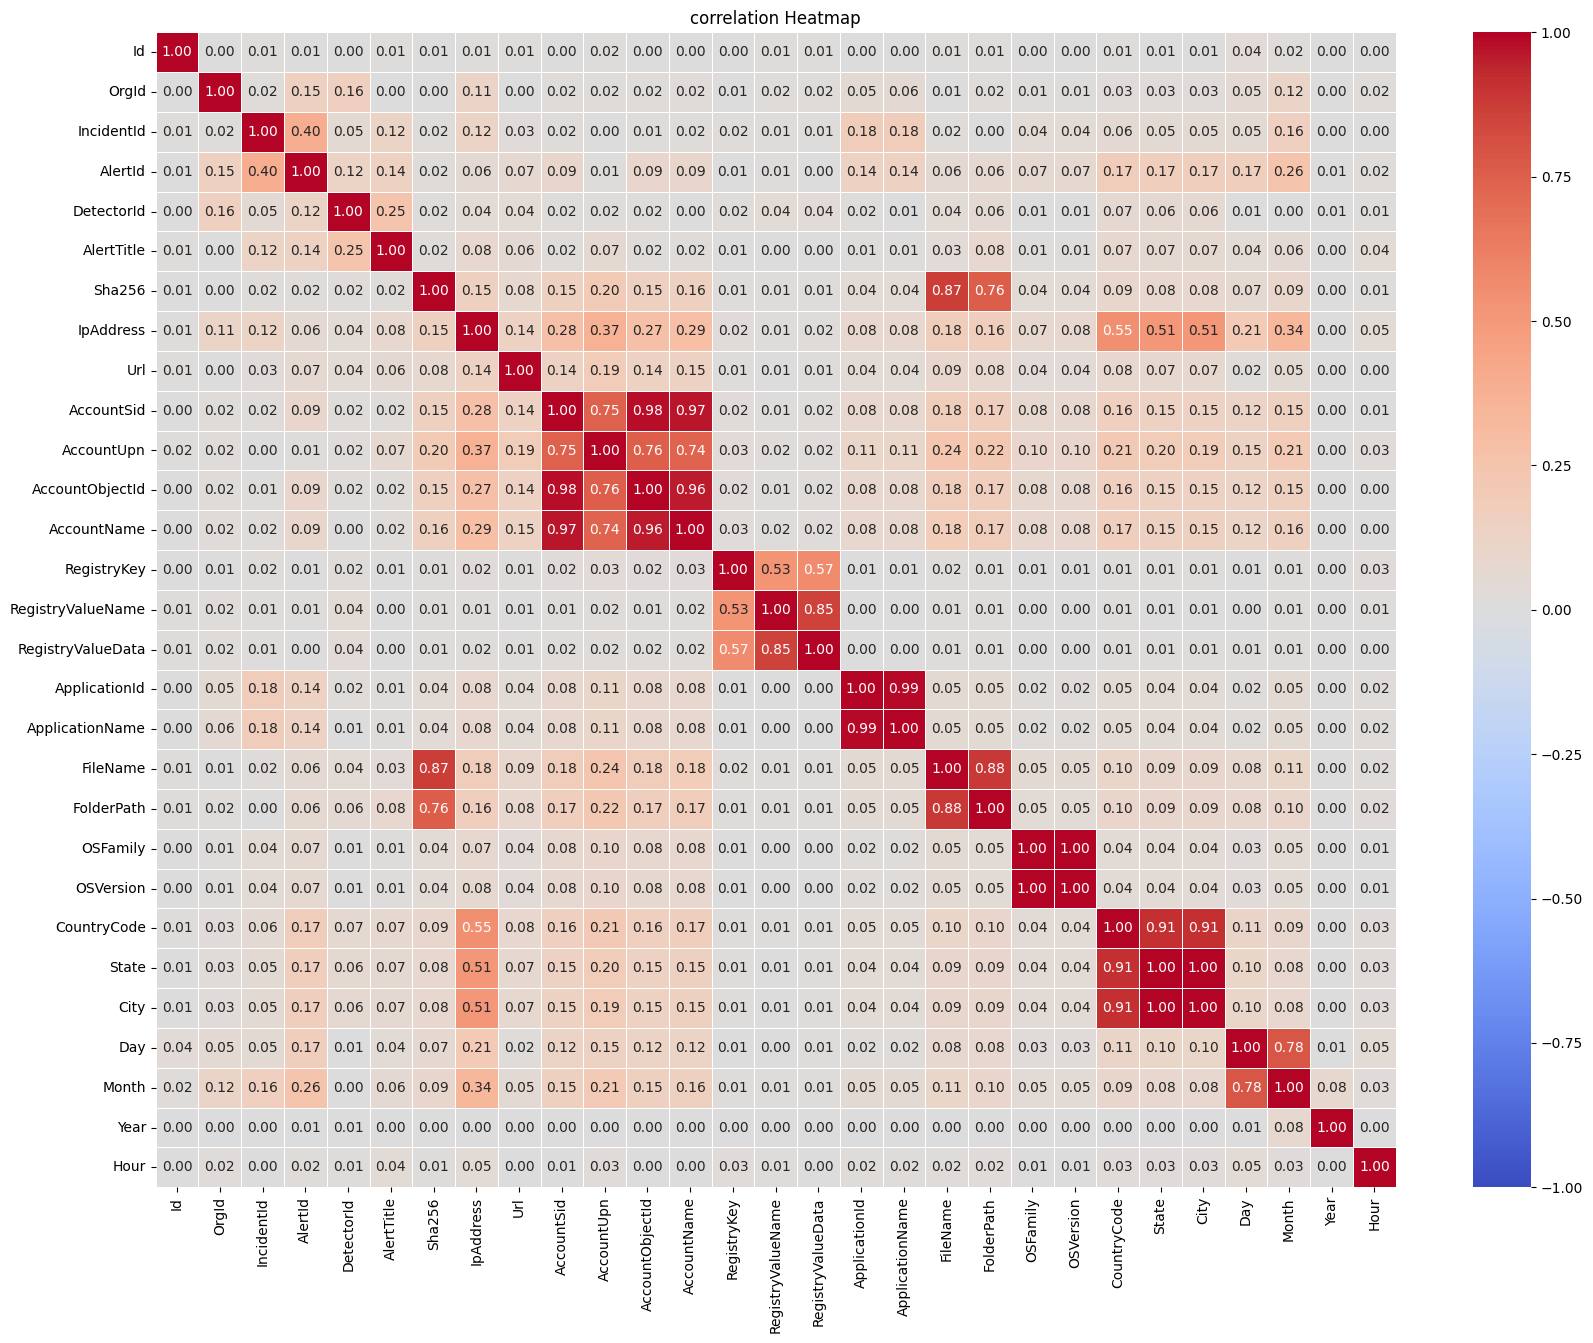

In [27]:
# selecting numerical col
numeric_df=df.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

## Removing the Correlated columns from the dataframe

In [28]:
# dropping 70% above correlated columns
df.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","OSFamily","OSVersion","AccountObjectId","State","FolderPath","AccountUpn"], axis =1 , inplace = True)

<P>Identifying the object datatype and printing them for futher analysis</p>

In [29]:
df.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection',
       'SuspicionLevel', 'LastVerdict', 'Usage', 'Time'],
      dtype='object')

In [30]:
Categorical_colts=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'Time']

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode categorical columns
categorical_columns = ['Category', 'EntityType', 'EvidenceRole',]
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate features and target
oval = df.drop(columns=['OrgId', 'IncidentId', 'AlertId', 'Time', 'IncidentGrade'])
atar = df['IncidentGrade']

# Apply oversampling
os = RandomOverSampler(random_state=94)
oval_resampled, atar_resampled = os.fit_resample(oval, atar)

print("Original class distribution:\n", atar.value_counts())
print("Resampled class distribution:\n", atar_resampled.value_counts())


Original class distribution:
 IncidentGrade
BenignPositive    1752895
TruePositive      1492329
FalsePositive      902664
Name: count, dtype: int64
Resampled class distribution:
 IncidentGrade
BenignPositive    1752895
FalsePositive     1752895
TruePositive      1752895
Name: count, dtype: int64


In [32]:
df.select_dtypes(include=["int32", "int64"]).columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'AccountName', 'RegistryKey', 'RegistryValueData', 'ApplicationId',
       'FileName', 'City', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [33]:
df1=df.copy()

In [34]:
df1.to_csv('/Users/deepanshudubb/Documents/mtest_process.csv',index= False)

In [98]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode categorical columns
categorical_columns = ['Category', 'EntityType', 'EvidenceRole',]
label_encoder = LabelEncoder()

for col in categorical_columns:
    df1[col] = label_encoder.fit_transform(df1[col])

# Separate features and target
oval = df.drop(columns=['OrgId', 'IncidentId', 'AlertId', 'Time', 'IncidentGrade'])
atar = df['IncidentGrade']

# Apply oversampling
os = RandomOverSampler(random_state=94)
oval_resampled, atar_resampled = os.fit_resample(oval, atar)

print("Original class distribution:\n", atar.value_counts())
print("Resampled class distribution:\n", atar_resampled.value_counts())


Original class distribution:
 IncidentGrade
BenignPositive    1752895
TruePositive      1492329
FalsePositive      902664
Name: count, dtype: int64
Resampled class distribution:
 IncidentGrade
BenignPositive    1752895
FalsePositive     1752895
TruePositive      1752895
Name: count, dtype: int64


In [99]:
from imblearn.over_sampling import RandomOverSampler

os =RandomOverSampler(random_state = 45)
oval =df1.drop('IncidentGrade', axis =1)
otar = df1['IncidentGrade']

<p>Counting the total counts of the target varibale with is IncidentGrade.

In [100]:
otar.value_counts()

IncidentGrade
BenignPositive    1752895
TruePositive      1492329
FalsePositive      902664
Name: count, dtype: int64

In [101]:
RC= RandomForestClassifier(n_estimators = 300, random_state =56)

In [102]:
oval=oval[[
 'DetectorId',
 'AlertTitle',
 'Id',
 'Day',
 'Category',
 'Hour',
 'AccountName',
 'EntityType',
 'IpAddress',
 'FileName']]

In [103]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)

In [104]:
traindata.shape

(3318310, 10)

In [105]:
testdata.shape

(829578, 10)

## Importing the Libraries RandomForestClassifier and xgboost

In [106]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost

<p>Creating Decision Tree with more parameters to prevent model from overfitting and complexity of model</p>

In [107]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")

<p>Training the data with Decision tree classifier</p>

In [108]:
dt_model.fit(traindata,trainlab)

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

<p>This defines a function which will calculate and return a dfFrame containing key performance metrics (accuracy, precision, recall, macro F1-score) for a classification model.

In [109]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

<P>Making the predictions on the train df and test df</p>

In [110]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)

In [111]:
dttrain_metrics=metrics(trainlab,dttr_pred)
dttest_metrics=metrics(testlab,dtts_pred)

<p>Making the dataframe for comparing the training and testing data</p>


In [112]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,70.033541,70.017406
1,Precision,72.022652,72.054664
2,Recall,65.333153,65.288750
3,Macro F1,66.482598,66.442232


<P>Defining and training the RandomForestClassifier with specific parameters like entropy to measure the imformation gain got from spliiting and morw features to enhance the performance of the model.</p>

In [113]:
# RANDOM FOREST
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)

<P>Fit the train data and train lab using randomForestClassifier</p>

In [114]:
rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [115]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)

In [116]:
rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)

In [117]:
pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()

,Metrics,Training,Testing
0,Accuracy,75.213136,75.186058
1,Precision,81.272846,81.300412
2,Recall,69.805996,69.763849
3,Macro F1,71.683613,71.642328


<P>Traning the xgboost model with specific hyperparameters and use it to make predictions

In [118]:
# XGBoost
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)

In [119]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels
trainlab_encoded = label_encoder.fit_transform(trainlab)
testlab_encoded = label_encoder.transform(testlab)  # Use the same encoder

# Mapping of labels
print("Label Mapping:", dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))))


Label Mapping: {'BenignPositive': 0, 'FalsePositive': 1, 'TruePositive': 2}


In [120]:
import xgboost as xgb

# Initialize the XGBoost model
xgbmodel = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    random_state=100,
    n_jobs=-1,
    max_depth=8
)

# Fit the model with encoded labels
xgbmodel.fit(traindata, trainlab_encoded)

# Predict using the model
xgbtr_pred = xgbmodel.predict(traindata)
xgbts_pred = xgbmodel.predict(testdata)



In [121]:
xgbtr_pred_decoded = label_encoder.inverse_transform(xgbtr_pred)
xgbts_pred_decoded = label_encoder.inverse_transform(xgbts_pred)

In [122]:
# Pad the shorter array to match the longer one (training predictions)
max_len = max(len(xgbtr_pred_decoded), len(xgbts_pred_decoded))
xgbtr_pred_decoded_padded = np.pad(xgbtr_pred_decoded, (0, max_len - len(xgbtr_pred_decoded)), mode='constant', constant_values=np.nan)
xgbts_pred_decoded_padded = np.pad(xgbts_pred_decoded, (0, max_len - len(xgbts_pred_decoded)), mode='constant', constant_values=np.nan)

# Create DataFrame with padded predictions
pd.DataFrame({
    "Training": xgbtr_pred_decoded_padded,
    "Testing": xgbts_pred_decoded_padded
}).reset_index(drop=True)



,Training,Testing
0,BenignPositive,FalsePositive
1,BenignPositive,BenignPositive
2,BenignPositive,TruePositive
3,TruePositive,TruePositive
4,BenignPositive,TruePositive
...,...,...
3318305,FalsePositive,NaN
3318306,BenignPositive,NaN
3318307,BenignPositive,NaN
3318308,BenignPositive,NaN


In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for training and testing sets
accuracy_train = accuracy_score(trainlab, xgbtr_pred_decoded)
accuracy_test = accuracy_score(testlab, xgbts_pred_decoded)

precision_train = precision_score(trainlab, xgbtr_pred_decoded, average='macro')
precision_test = precision_score(testlab, xgbts_pred_decoded, average='macro')

recall_train = recall_score(trainlab, xgbtr_pred_decoded, average='macro')
recall_test = recall_score(testlab, xgbts_pred_decoded, average='macro')

f1_train = f1_score(trainlab, xgbtr_pred_decoded, average='macro')
f1_test = f1_score(testlab, xgbts_pred_decoded, average='macro')

# Create the DataFrame with metrics
metrics_df = pd.DataFrame({
    "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
    "Training": [accuracy_train, precision_train, recall_train, f1_train],
    "Testing": [accuracy_test, precision_test, recall_test, f1_test]
})

# Print the metrics DataFrame
print(metrics_df)


     Metrics  Training   Testing
0   Accuracy  0.848323  0.847254
1  Precision  0.873441  0.872472
2     Recall  0.824293  0.823070
3   Macro F1  0.840251  0.839072


In [134]:
import plotly.graph_objects as go
import numpy as np

# Data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'Macro F1']
models = ['Decision Tree', 'Random Forest', 'XGBoost']

# Train data
train_data = {
    'Decision Tree': [59.412724, 62.082146, 59.411835, 59.846393],
    'Random Forest': [66.417432, 68.791961, 66.419161, 66.145443],
    'XGBoost': [74.6318, 75.5281, 74.6319, 74.6642]
}

# Test data
test_data = {
    'Decision Tree': [59.440134, 62.112163, 59.443693, 59.871125],
    'Random Forest': [66.414228, 68.776270, 66.407327, 66.138819],
    'XGBoost': [74.6207, 75.5101, 74.6205, 74.6515]
}

# Convert to arrays
train_values = np.array(list(train_data.values()))
test_values = np.array(list(test_data.values()))

# Create bar plot
fig = go.Figure()

# Add bars for train and test data
for i, model in enumerate(models):
    fig.add_trace(go.Bar(
        x=metrics,
        y=train_values[i],
        name=f'{model} (Train)',
        marker=dict(color=f'rgba({50 + i * 50},150,250,0.7)')
    ))
    fig.add_trace(go.Bar(
        x=metrics,
        y=test_values[i],
        name=f'{model} (Test)',
        marker=dict(color=f'rgba({50 + i * 50},100,200,0.7)', pattern=dict(shape="x"))
    ))

# Layout customization
fig.update_layout(
    title="Model Performance Comparison",
    xaxis_title="Metrics",
    yaxis_title="Performance (%)",
    barmode='group',
    legend=dict(title="Models"),
    template="plotly_white"
)

# Show the plot
fig.show()
